In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 



In [5]:
data = pd.read_excel('HousePricePrediction.xlsx')
print(data.head())

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [6]:
data.shape

(2919, 13)

In [8]:
obj  =  data.dtypes=='object'
obj_col = list(obj[obj].index)
print("Categorical variables : " , len(obj_col))

int = data.dtypes=='int'
num_col = list(int[int].index)
print("Integer var : " , len(num_col))

fl = data.dtypes == 'float'
fl_col = list(fl[fl].index)
print("Floating var : " , len(fl_col))

Categorical variables :  4
Integer var :  6
Floating var :  3


<Axes: >

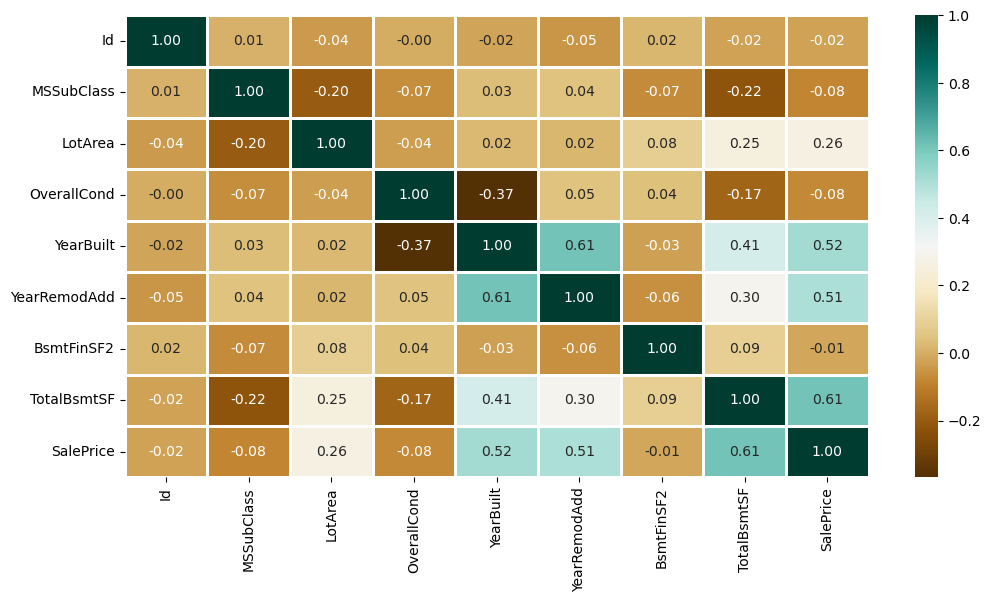

In [10]:
num_data = data.select_dtypes(include = ['number'])

plt.figure(figsize=(12,6))
sns.heatmap(num_data.corr() , cmap = 'BrBG' , fmt = '.2f' , linewidths = 2 , annot = True)

<Axes: title={'center': 'No . of unique values of categorical feature '}>

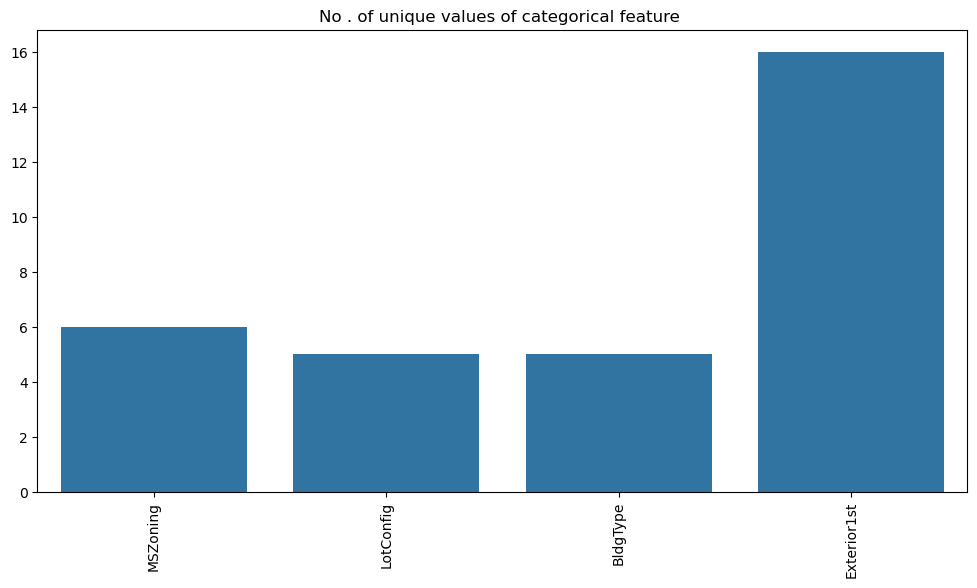

In [12]:
unique_values = [] 

for col in obj_col : 
    unique_values.append(data[col].unique().size)

plt.figure(figsize = ( 12,6 ))
plt.title('No . of unique values of categorical feature ')
plt.xticks(rotation = 90)
sns.barplot(x=obj_col , y = unique_values)

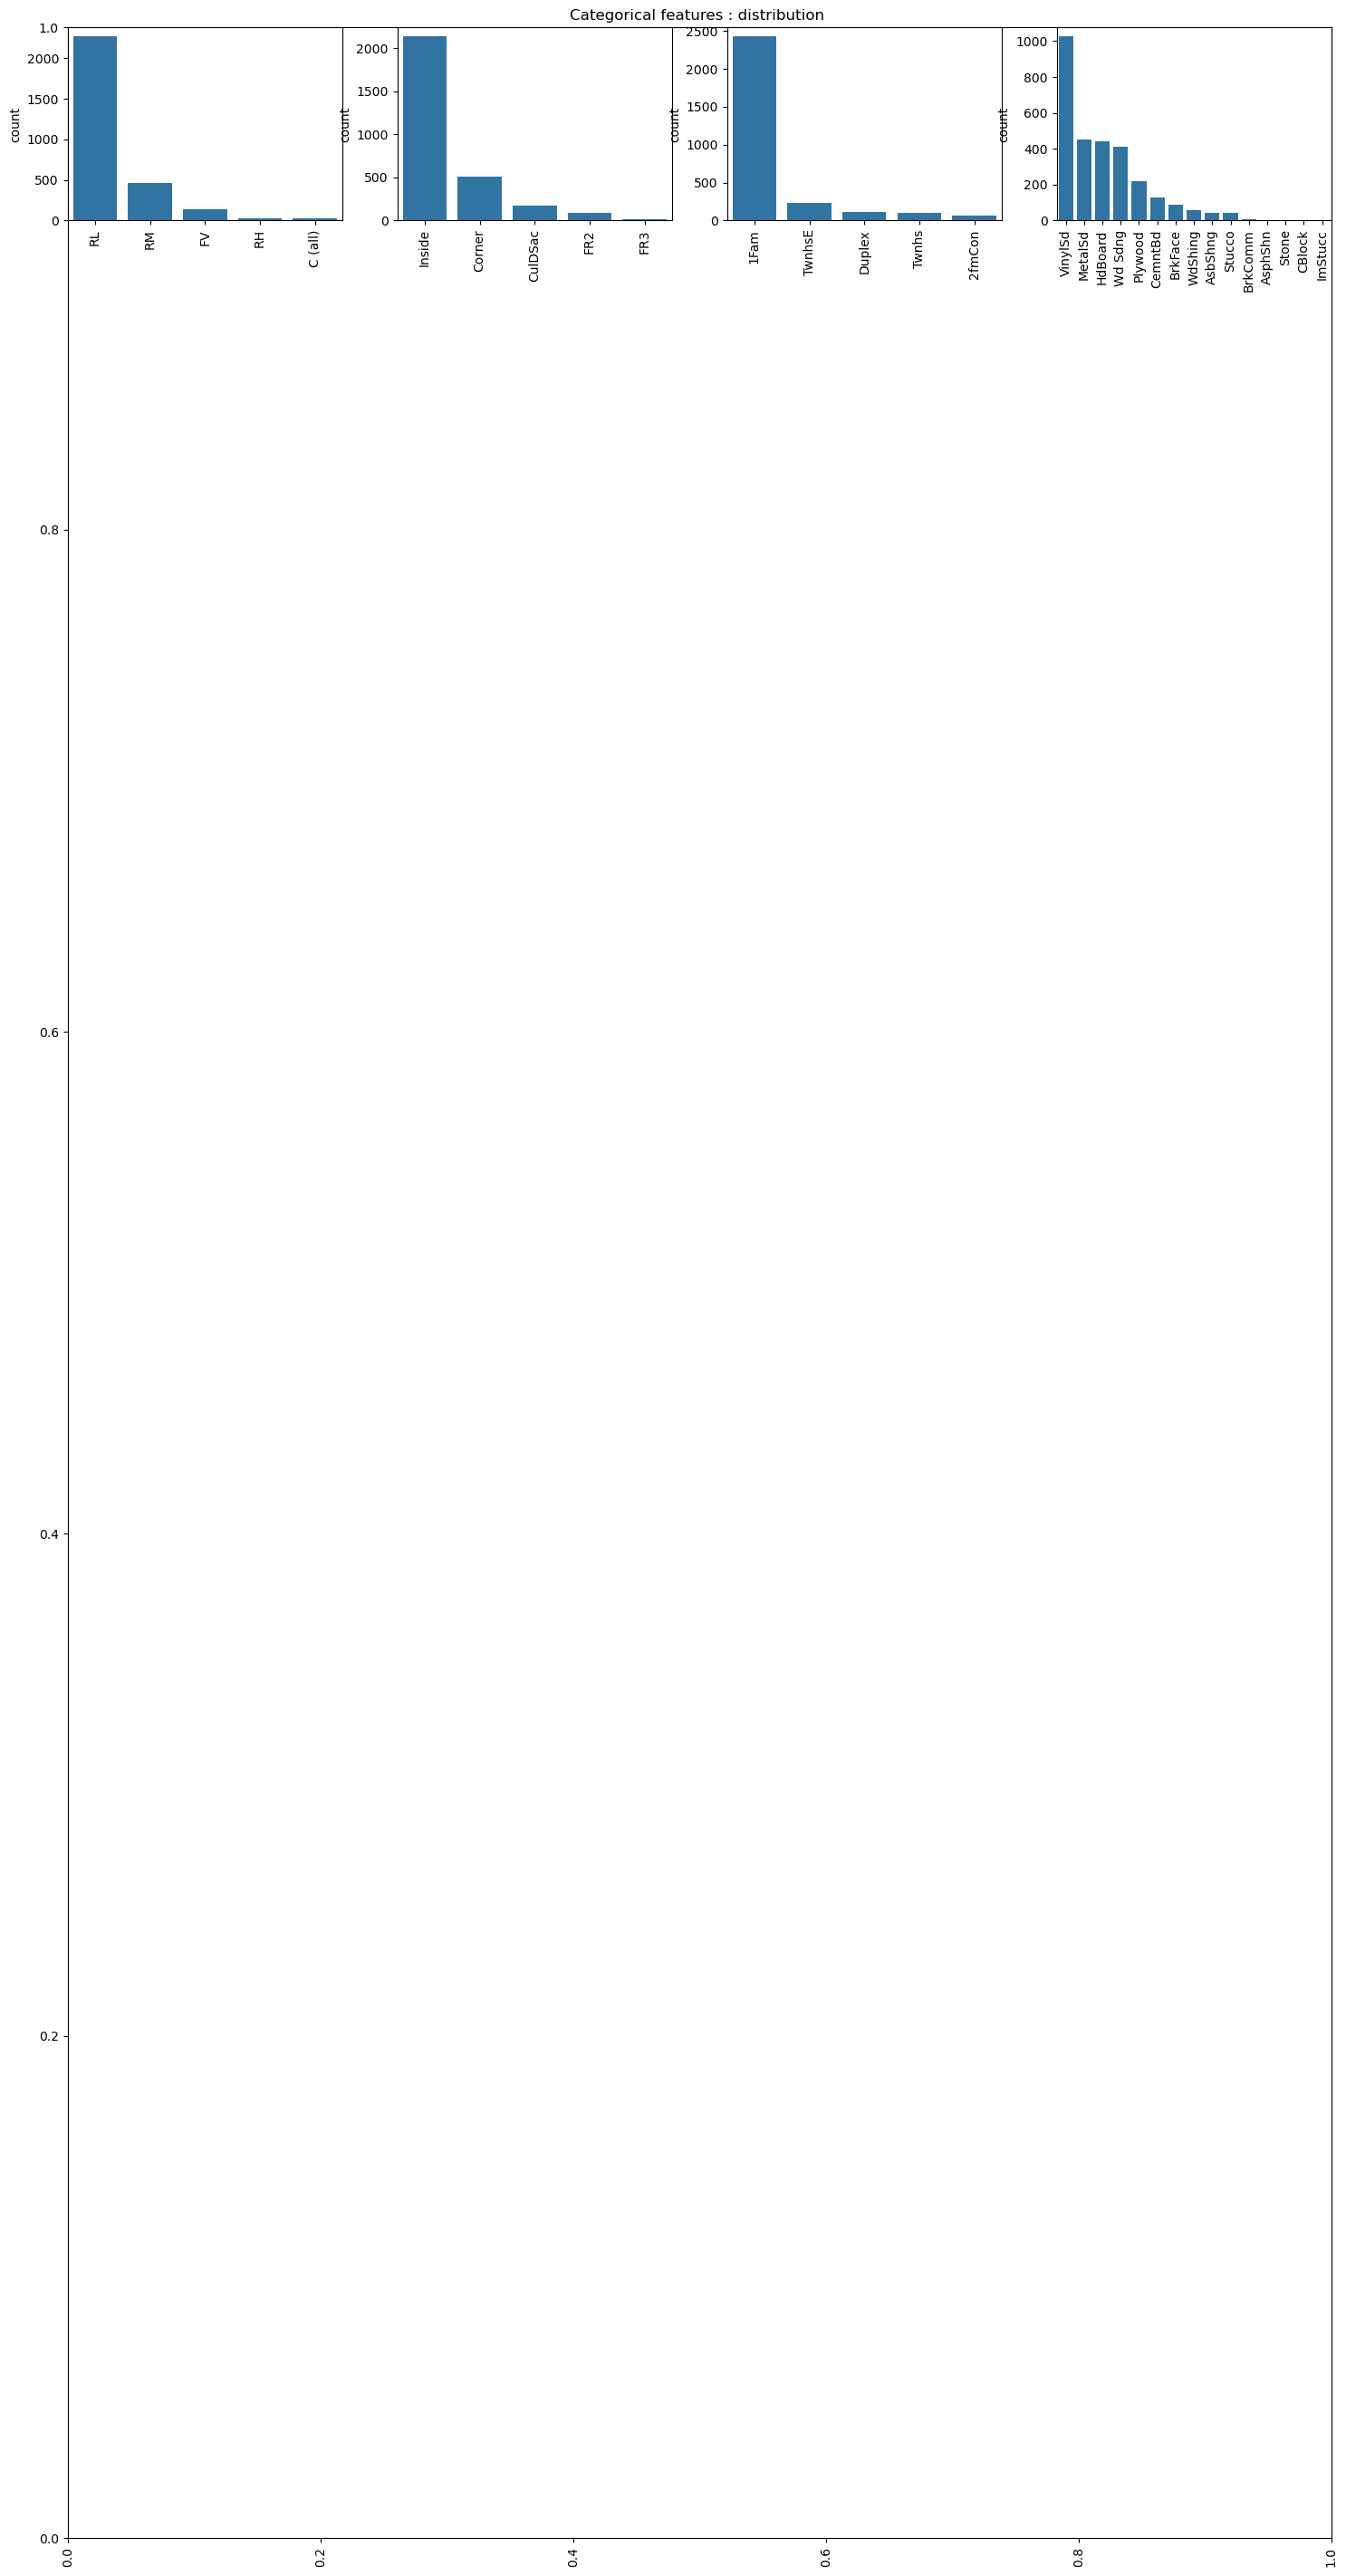

In [16]:
plt.figure(figsize=(18,36))
plt.title('Categorical features : distribution ')
plt.xticks(rotation = 90) 
index = 1 

for col in obj_col : 
    y = data[col].value_counts() 
    plt.subplot(11,4,index) 
    plt.xticks(rotation = 90) 
    sns.barplot(x=list(y.index) , y=y) 
    index+=1 

In [28]:
data['SalePrice'] = data['SalePrice'].fillna(data['SalePrice'].mean())

In [29]:
new_dataset = data.dropna()
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [30]:
from sklearn.preprocessing import OneHotEncoder 

s = (new_dataset.dtypes == 'object')
obj_cols = list(s[s].index)
print('Categorical var : ')
print(obj_cols)
print('No of categorical var : ' , len(obj_cols))

Categorical var : 
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No of categorical var :  4


In [31]:
oh_encoder = OneHotEncoder(sparse_output=False , handle_unknown='ignore') 
oh_cols = pd.DataFrame(oh_encoder.fit_transform(new_dataset[obj_cols])) 
oh_cols.index = new_dataset.index 
oh_cols.columns = oh_encoder.get_feature_names_out() 
df_final = new_dataset.drop(obj_cols , axis = 1) 
df_final  = pd.concat([df_final , oh_cols] , axis = 1) 
print(df_final)

      MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0             60     8450            5       2003          2003         0.0   
1             20     9600            8       1976          1976         0.0   
2             60    11250            5       2001          2002         0.0   
3             70     9550            5       1915          1970         0.0   
4             60    14260            5       2000          2000         0.0   
...          ...      ...          ...        ...           ...         ...   
2914         160     1936            7       1970          1970         0.0   
2915         160     1894            5       1970          1970         0.0   
2916          20    20000            7       1960          1996         0.0   
2917          85    10441            5       1992          1992         0.0   
2918          60     9627            5       1993          1994         0.0   

      TotalBsmtSF     SalePrice  MSZoning_C (all)  

In [33]:
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split 

X= df_final.drop(['SalePrice'] , axis=1) 
Y = df_final['SalePrice'] 

X_train , X_valid , Y_train , Y_valid = train_test_split(X,Y,train_size = 0.8 , test_size = 0.2 , random_state = 0) 


In [34]:
# Svm 

from sklearn import svm 
from sklearn.svm import SVC 
from sklearn.metrics import mean_absolute_percentage_error 

model = svm.SVR() 
model.fit(X_train,Y_train) 
y_pred = model.predict(X_valid) 

print(mean_absolute_percentage_error(y_pred , Y_valid))

0.15945441496865861


In [35]:
from sklearn.linear_model import LinearRegression
mod = LinearRegression() 
mod.fit(X_train , Y_train) 
y_pred = mod.predict(X_valid ) 

print(mean_absolute_percentage_error(y_pred, Y_valid))

0.17351381687806447
